In [1]:
import pandas as pd
import numpy as np 
import geopandas as gp 
import mesa_geo


In [13]:
from mesa_geo import GeoSpace, GeoAgent, AgentCreator
from mesa import Model
import requests
url = 'http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_20m.json'
r = requests.get(url)
geojson_states = r.json()


In [14]:
class State(GeoAgent):
    def __init__(self, unique_id, model, shape):
        super().__init__(unique_id, model, shape)

class GeoModel(Model):
    def __init__(self):
        self.grid = GeoSpace()
        
        state_agent_kwargs = dict(model=self)
        AC = AgentCreator(agent_class=State, agent_kwargs=state_agent_kwargs)
        agents = AC.from_GeoJSON(GeoJSON=geojson_states, unique_id="NAME")
        self.grid.add_agents(agents)


Arkansas


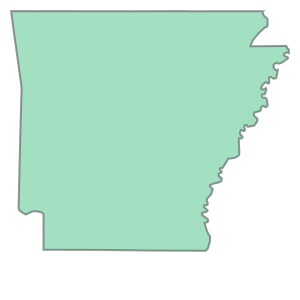

In [15]:
m = GeoModel()
agent = m.grid.agents[1]
print(agent.unique_id)
agent.shape


In [27]:
agent.CENSUSAREA

261231.711

In [28]:
neighbors = m.grid.get_neighbors(agent)
print([a.unique_id for a in neighbors])


['Oklahoma', 'Arkansas', 'Louisiana', 'New Mexico']
/Users/jakobschlierf/opt/anaconda3/envs/Sim_mod/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
 There are 3 islands with ids: 7, 20, 26.
  warnings.warn(message)


In [17]:
[a.unique_id for a in m.grid.get_neighbors_within_distance(agent, 600000)]


['California',
 'Nevada',
 'Arizona',
 'Utah',
 'Wyoming',
 'New Mexico',
 'Colorado',
 'Texas']

## Code snippet

In [16]:
import geopandas as gpd
import pandas as pd
routes_df = pd.read_csv('routes.csv')
distances_df = pd.read_csv('distances.csv')
ports_df = pd.read_csv('ports.csv')

In [17]:
ports_df["coords"] = ports_df["coords"].apply(lambda x: eval(x)[0])
ports_df["x"] = ports_df["coords"].apply(lambda x: x[0])
ports_df["y"] = ports_df["coords"].apply(lambda x: x[1])

In [18]:
ports_gdf = gpd.GeoDataFrame(
    ports_df, geometry=gpd.points_from_xy(ports_df.x,ports_df.y))

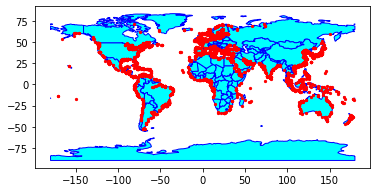

In [20]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(color='cyan', edgecolor='blue')
ports_gdf.plot(ax=base, marker='o', color='red', markersize=5);

# Trying out a network based model 
Aligned to this:
https://dmnfarrell.github.io/bioinformatics/abm-mesa-network

In [2]:
import time, enum, math
import numpy as np
import pandas as pd
import pylab as plt
from mesa import Agent, Model
from mesa.time import SimultaneousActivation
from mesa.space import NetworkGrid
from mesa.datacollection import DataCollector
from networkx.algorithms.shortest_paths.generic import has_path
import networkx as nx
import panel as pn
import panel.widgets as pnw
import random


In [3]:
def kmtoNaut(km):
    return km / 1.852

In [4]:
N = ['SHA', 'ROT', 'CAP', 'SUE', 'PSA']
print(sorted(('SHA', 'ROT', 'CAP', 'SUE', 'PSA')))

['CAP', 'PSA', 'ROT', 'SHA', 'SUE']


In [5]:
a = random.sample(N, k=2)
print(a[1])

SHA


In [6]:
distances = [
    ['CAP', 'ROT', 11367.07658],
    ['CAP', 'ROT', 15000],
    ['CAP', 'SUE', 9814.514498],
    ['CAP', 'SHA', 14090.03741],
    ['ROT', 'PSA', 6013.579478],
    ['PSA', 'SUE', 162.274111],
    ['SHA', 'SUE', 13162.53259]

]

In [7]:
for i in range(len(distances)):
    distances[i][2] = kmtoNaut(distances[i][2])


In [13]:
print("Route with Suez",7107+87+3247)
print("Route without Suez", 7608 + 6137)
print("Route to Suez, then changing", 7107+5299+6137)

Route with Suez 10441
Route without Suez 13745
Route to Suez, then changing 18543


In [8]:
G = nx.MultiGraph()
G.add_nodes_from(N)
for i in range(len(distances)):
            G.add_edge(distances[i][0], distances[i][1], length=distances[i][2]) #change to weights 


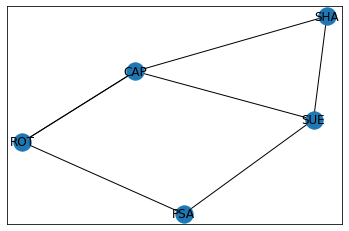

In [9]:
labels = nx.get_edge_attributes(G, 'size') 
nx.draw_networkx(G)

In [22]:
def ident_distance(distances, position, next_position): #look up the distance of the current step
        for i in range(len(distances)):
            if distances[i][0] == position and distances[i][1] == next_position:
                dist = distances[i][2]
                return dist
            if distances[i][1] == position and distances[i][0] == next_position:
                dist = distances[i][2]
                return dist

In [11]:
print(distances)

[['CAP', 'ROT', 6137.730334773219], ['CAP', 'ROT', 8099.352051835853], ['CAP', 'SUE', 5299.413875809935], ['CAP', 'SHA', 7608.011560475162], ['ROT', 'PSA', 3247.0731522678184], ['PSA', 'SUE', 87.62101025917926], ['SHA', 'SUE', 7107.199022678185]]


In [35]:
route = nx.dijkstra_path(G,'SHA','ROT', weight='length')
distance = nx.dijkstra_path_length(G,'SHA','ROT', weight='length')


print(route, distance)

['SHA', 'SUE', 'PSA', 'ROT'] 10441.893185205183


In [45]:
for i in range(len(route)-1):
    if not has_path(G,route[i], route[i+1]):
        print("h")
    else:
        
    

In [25]:
distance = distance - ident_distance(distances, route[0], route[1])
route.remove(route[0])

print(route, distance)

['SUE', 'PSA', 'ROT'] 3334.6941625269974


In [28]:
print(nx.dijkstra_path(G,'SHA','ROT', weight='length'))
print(nx.dijkstra_path_length(G,'SHA','ROT', weight='length'))

['SHA', 'SUE', 'PSA', 'ROT']
10441.893185205183


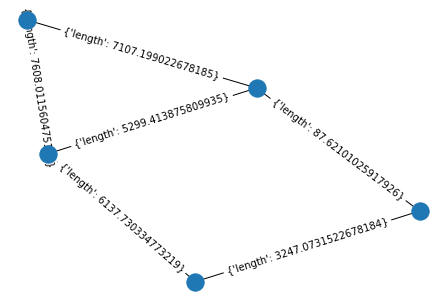

In [14]:

pos = nx.spring_layout(G)
nx.draw(G, pos)
nx.draw_networkx_edge_labels(G, pos)
plt.show()

In [12]:
nx.algorithms.shortest_paths.generic.has_path(G,'SHA', 'ROT')

True

In [13]:
G.remove_edge('CAP','ROT')

In [77]:
class ShippingNetwork(Model):
    def __init__(self, N, distances, S=2):
        self.ports = N
        self.num_ships = S
        # self.distances = distances
        self.schedule = SimultaneousActivation(self)

        self.G = nx.Graph()
        self.G.add_nodes_from(self.ports) #instatiate the ports as nodes of network
        for i in range(len(distances)): #create bi-directional edges with an attribute for length 
            self.G.add_edge(distances[i][0], distances[i][1], length=distances[i][2])
        self.grid = NetworkGrid(self.G) #Define Mesa Grid as the just created Network to allow for shipping only in routes

        #create agents 
        Ships = []
        for i in range(self.num_ships):
            port = random.sample(self.ports, k=2) # this is a test - implementation, more complex algorithming is necessary
            a = Ship(i+1, self, self.G, port[0], port[1], distances)
            #append to list of ships
            Ships.append(a)
            #place agent on origin node
            self.grid.place_agent(a, port[0])
        
    #create ability to remove edges mid-model
    def network_change (self, change_type, change_edge):
        if change_type == "add":
            self.G.add_edge(self.change_edge[0], self.change_edge[1], length=self.change_edge[2])
        if change_type == "remove":
            self.G.remove_edge(self.change_edge[0],self.change_edge[1])
        #update model with new grid    
        return NetworkGrid(self.G), G

    def step(self, distances, G, change_type='', change_edge=[]):
        #check network for changes
        if change_type != '':
            self.grid, G = network_change(change_type, change_edge)
        #Run each Agents
        self.schedule.step()

        # draw the network? 




In [73]:
class Ship(Agent):
    def __init__(self, unique_id, model, G, start_port, destin_port, distances, s=13):
        self.destination = destin_port
        self.state = 0 #0 for active, numbers > 0 for weeks that ships have to "wait" until arrival to port
        self.speed = s*24*7 #speed is given in knots, with 1 knot being 1 nautical mile per hour
        self.position = start_port
        self.init_route = nx.dijkstra_path(G, self.position, self.destination, weight='length') #We keep a copy of the entire itinerary / distance traveled
        self.init_dist = nx.dijkstra_path_length(G,self.position, self.destination, weight='length') 
        self.current_route, self.current_dist = self.init_route, self.init_dist  #For comparison & navigational purposes, we use current route & distance
        self.next_position = self.current_route[1]
        self.itinerary = [self.position] # we keep track of the distance traveled using 
        self.distance_traveled = 0


    def routing(self, G):
        #implement dijkstra to define shortest route
        route = nx.dijkstra_path(G, self.position, self.destination, weight='length')
        travel_distance = nx.dijkstra_path_length(G,self.position, self.destination, weight='length')
        #include a way for capacity?
        return route, travel_distance
    
    def move(self, distances):
        self.step_size = ident_distance(distances) #look up the distance between two cities 
        self.state = step_size / self.speed #change state to step amount
        self.current_dist = self.current_dist - self.step_size #adjust current distance minus the distance traveled in the next step
        self.model.grid.move_agent(self, next_position) #move the agent
        self.current_route.remove(current_route[0]) #remove the next step from the itinerary
        self.next_position = self.current_route[1] #update current route


    def ident_distance(self, distances): #look up the distance of the current step
        for i in range(len(distances)):
            if distances[i][0] == self.position and distances[i][1] == self.next_position:
                dist = distances[i][2]
                return dist
            if distances[i][1] == self.next_position and distances[i][0] == self.position:
                dist = distances[i][2]
                return dist

    def step(self, distances, G):
        self.state = self.state - 1 #'move' ships by one weeks progress
        if self.state <= 0: #ships that are en-route to the node they are going to next do not move / perform other activities
            self.itinerary.append(self.position) #add the current position to itinerary
            new_route, new_distance = routing(G) #perform a new routing to compare against current routing
            if new_route == self.current_route: #if current routing is the same as new, just move (default case)
                self.move(distances)
            elif new_distance > self.current_dist: #if current route is shorter than newly calculated route, check for obstructions
                for i in range(len(self.current_route)-1):
                    if not has_path(G, current_route[i], current_route[i+1]): 
                        self.current_route = new_route
                        self.current_dist = new_distance
                self.move(distances)
            else: # final option is that current route is longer than new route (think Suez reopening after a while), here, we just take the new option
                self.current_route = new_route
                self.current_dist = new_distance
                self.move(distances)


    
    # def collect_time

    # def collect_costs

In [60]:
for i in enumerate(distances):
    print(i)

(0, ['CAP', 'ROT', 6137.730334773219])
(1, ['CAP', 'SUE', 5299.413875809935])
(2, ['CAP', 'SHA', 7608.011560475162])
(3, ['ROT', 'PSA', 3247.0731522678184])
(4, ['PSA', 'SUE', 87.62101025917926])
(5, ['SHA', 'SUE', 7107.199022678185])


In [79]:
model = ShippingNetwork(N, distances)
steps = 2
for i in range(steps):
    model.step(distances, G)

## Code Source 

In [28]:
class State(enum.IntEnum):
    SUSCEPTIBLE = 0
    INFECTED = 1
    REMOVED = 2

In [32]:
class NetworkInfectionModel(Model):
    """A model for infection spread."""

    def __init__(self, N=10, ptrans=0.5, avg_node_degree=3,
                 progression_period=3, progression_sd=2, death_rate=0.0193, recovery_days=21,
                 recovery_sd=7):

        #self.num_agents = N
        self.num_nodes = N  
        prob = avg_node_degree / self.num_nodes

        self.initial_outbreak_size = 1
        self.recovery_days = recovery_days
        self.recovery_sd = recovery_sd
        self.ptrans = ptrans
        self.death_rate = death_rate

        self.G = nx.erdos_renyi_graph(n=self.num_nodes, p=prob)
        self.grid = NetworkGrid(self.G)

        self.schedule = RandomActivation(self)
        self.running = True
        #self.dead_agents = []

        # Create agents
        for i, node in enumerate(self.G.nodes()):
            a = MyAgent(i+1, self)
            self.schedule.add(a)
            #add agent
            self.grid.place_agent(a, node)

            #make some agents infected at start
            infected = np.random.choice([0,1], p=[0.99,0.01])
            if infected == 1:
                a.state = State.INFECTED
                a.recovery_time = self.get_recovery_time()

        self.datacollector = DataCollector(            
            agent_reporters={"State": "state"})

    def get_recovery_time(self):
        return int(self.random.normalvariate(self.recovery_days,self.recovery_sd))

    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

In [33]:
class MyAgent(Agent):
    """ An agent in an epidemic model."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.age = int(self.random.normalvariate(20,40))
        self.state = State.SUSCEPTIBLE  
        self.infection_time = 0

    def move(self):
        """Move the agent"""

        possible_steps = [
            node
            for node in self.model.grid.get_neighbors(self.pos, include_center=False)
            if self.model.grid.is_cell_empty(node)
        ]
        if len(possible_steps) > 0:
            new_position = self.random.choice(possible_steps)                 
            self.model.grid.move_agent(self, new_position)

    def status(self):
        """Check infection status"""

        if self.state == State.INFECTED:     
            drate = self.model.death_rate
            alive = np.random.choice([0,1], p=[drate,1-drate])
            if alive == 0:
                self.model.schedule.remove(self)            
            t = self.model.schedule.time-self.infection_time
            if t >= self.recovery_time:          
                self.state = State.REMOVED
            #print (self.model.schedule.time,self.recovery_time,t)

    def contact(self):
        """Find close contacts and infect"""

        neighbors_nodes = self.model.grid.get_neighbors(self.pos, include_center=False)
        susceptible_neighbors = [
            agent
            for agent in self.model.grid.get_cell_list_contents(neighbors_nodes)
            if agent.state is State.SUSCEPTIBLE
        ]
        for a in susceptible_neighbors:
            if self.random.random() < model.ptrans:
                a.state = State.INFECTED
                a.recovery_time = model.get_recovery_time()

    def step(self):
        self.status()
        self.move()
        self.contact()

    def toJSON(self):        
        d = self.unique_id
        return json.dumps(d, default=lambda o: o.__dict__,
            sort_keys=True, indent=4)

In [6]:
model = NetworkInfectionModel(300, distances)
steps = 2
for i in range(steps):
    model.step()

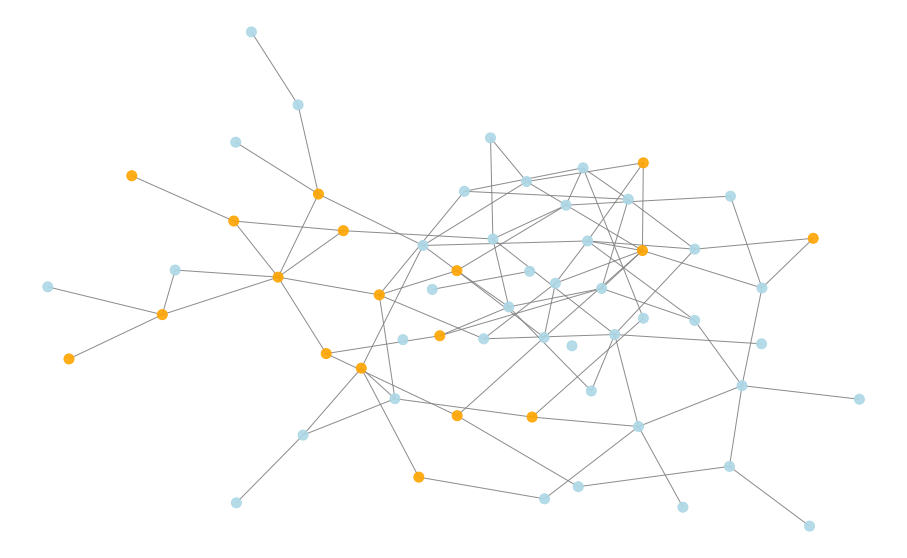

In [40]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
cmap = ListedColormap(["lightblue", "orange", "green",])

def plot_grid(model,fig,layout='spring',title=''):
    graph = model.G
    if layout == 'kamada-kawai':      
        pos = nx.kamada_kawai_layout(graph)  
    elif layout == 'circular':
        pos = nx.circular_layout(graph)
    else:
        pos = nx.spring_layout(graph, iterations=5, seed=8)  
    plt.clf()
    ax=fig.add_subplot()
    states = [int(i.state) for i in model.grid.get_all_cell_contents()]
    colors = [cmap(i) for i in states]

    nx.draw(graph, pos, node_size=100, edge_color='gray', node_color=colors, #with_labels=True,
            alpha=0.9,font_size=14,ax=ax)
    ax.set_title(title)
    return

#example usage
fig,ax=plt.subplots(1,2,figsize=(16,10))
model = NetworkInfectionModel(60, ptrans=0.1)
model.step()
f=plot_grid(model,fig,layout='kamada-kawai')


In [8]:
def run_model(pop, ptrans, degree, steps, delay, layout):

    model = NetworkInfectionModel(pop, ptrans=ptrans, avg_node_degree=degree)

    fig1 = plt.Figure(figsize=(8,6))
    grid_pane.object = fig1
    fig2 = plt.Figure(figsize=(8,6))
    ax2=fig2.add_subplot(1,1,1,label='b')
    states_pane.object = fig2

    #step through the model and plot at each step
    for i in range(steps):
        model.step()
        plot_grid(model,fig1,title='step=%s' %i, layout=layout)        
        grid_pane.param.trigger('object')
        ax2.clear()
        plot_states(model,ax2)
        ax2.set_xlim(0,steps)        
        states_pane.param.trigger('object')    
        time.sleep(delay)
    plt.clf()

grid_pane = pn.pane.Matplotlib()
states_pane = pn.pane.Matplotlib()
go_btn = pnw.Button(name='run',width=100,button_type='primary')
pop_input = pnw.IntSlider(name='population',value=100,start=10,end=1000,step=10,width=100)
ptrans_input = pnw.FloatSlider(name='prob. trans',value=0.1,width=100)
degree_input = pnw.IntSlider(name='node degree',value=3,start=1,end=10,width=100)
steps_input = pnw.IntSlider(name='steps',value=20,start=5,end=100,width=100)
delay_input = pnw.FloatSlider(name='delay',value=.2,start=0,end=3,step=.2,width=100)
layout_input = pnw.Select(name='layout',options=['spring','circular','kamada-kawai'],width=100)
widgets = pn.WidgetBox(go_btn,pop_input,ptrans_input,degree_input,steps_input,delay_input,layout_input)

def execute(event):
    #run the model with widget options
    run_model(pop_input.value, ptrans_input.value, degree_input.value,
              steps_input.value, delay_input.value, layout_input.value)
go_btn.param.watch(execute, 'clicks')
pn.extension()
pn.Row(pn.Column(widgets),grid_pane,states_pane,sizing_mode='stretch_width')

Row(sizing_mode='stretch_width')
    [0] Column
        [0] WidgetBox
            [0] Button(button_type='primary', name='run', width=100)
            [1] IntSlider(end=1000, name='population', start=10, step=10, value=100, width=100)
            [2] FloatSlider(name='prob. trans', value=0.1, width=100)
            [3] IntSlider(end=10, name='node degree', start=1, value=3, width=100)
            [4] IntSlider(end=100, name='steps', start=5, value=20, width=100)
            [5] FloatSlider(end=3, name='delay', step=0.2, value=0.2, width=100)
            [6] Select(name='layout', options=['spring', 'circular', ...], value='spring', width=100)
    [1] Matplotlib(None)
    [2] Matplotlib(None)

In [24]:
# import networkx as nx
# import numpy as np
# import string

# str1 = "/Users/jakobschlierf/opt/anaconda3/envs/Sim_mod/lib/graphviz"
# sys.path.append(str1)

# dt = [('len', float)]
# A = np.array([(0, 0.3, 0.4, 0.7),
#                (0.3, 0, 0.9, 0.2),
#                (0.4, 0.9, 0, 0.1),
#                (0.7, 0.2, 0.1, 0)
#                ])*10
# A = A.view(dt)

# G = nx.from_numpy_matrix(A)
# G = nx.relabel_nodes(G, dict(zip(range(len(G.nodes())),string.ascii_uppercase)))    

# G = nx.drawing.nx_agraph.to_agraph(G)

# G.node_attr.update(color="red", style="filled")
# G.edge_attr.update(color="blue", width="2.0")


# G.draw('/tmp/out.png', format='png', prog='neato')

## Testing Network Changes

In [1]:
import time, enum, math
import numpy as np
import pandas as pd
import pylab as plt
from mesa import Agent, Model
from mesa.time import SimultaneousActivation, RandomActivation
from mesa.space import NetworkGrid
from mesa.datacollection import DataCollector
from networkx.algorithms.shortest_paths.generic import has_path
import networkx as nx
import panel as pn
import panel.widgets as pnw
import random
from tqdm import tqdm, trange
from time import sleep

data_path = '../' #set to wherever the data files are, will be used on every input

In [2]:
ports = pd.read_csv((data_path +'ports.csv'))
data = pd.read_csv((data_path + 'distances.csv'))
origin = pd.read_csv((data_path + 'origin_ports.csv'))
route_blockages = pd.read_csv((data_path + 'route_blockage.csv'))
distances = data[["prev_port", "next_port", "distance"]]
distances.astype({'prev_port':'int64', 'next_port':'int64'}).dtypes
N = data["next_port"].tolist()
N = list(set(N))

In [15]:
G = nx.MultiGraph()
G.add_nodes_from(N) #instatiate the ports as nodes of network
for i in range(len(distances)): #create bi-directional edges with an attribute for length 
       G.add_edge(distances.iloc[i][0], distances.iloc[i][1], length=distances.iloc[i][2])
grid = NetworkGrid(G) #Define Mesa Grid as the just created Network to allow for shipping only in routes

In [4]:
# When cutting the network, we want to ensure that we cut the correct number of edges 
# we therefore create a list indicating the number of edges 
num_of_edges = []
for index, row in route_blockages.iterrows(): 
    num_of_edges.append(G.number_of_edges(u=route_blockages.iloc[index]['prev_port'], v=route_blockages.iloc[index]['next_port']))

In [5]:
route_blockages["Num of edges"] = num_of_edges

In [17]:
route_blockages_gib =  route_blockages[route_blockages['affected_by_gibraltar']==True]
route_blockages_mal =  route_blockages[route_blockages['affected_by_malacca']==True]
route_blockages_dov =  route_blockages[route_blockages['affected_by_dover']==True]
route_blockages_suez =  route_blockages[route_blockages['affected_by_suez']==True]
route_blockages_horm =  route_blockages[route_blockages['affected_by_hormuz']==True]

In [18]:
route_blockages_horm.head()

,Unnamed: 0,prev_port,next_port,affected_by_gibraltar,affected_by_malacca,affected_by_dover,affected_by_suez,affected_by_hormuz,Num of edges
111,111,471,1975,False,True,False,False,True,2
112,112,471,2075,False,True,False,False,True,2
119,119,471,3039,False,False,False,False,True,2
122,122,471,3606,False,False,False,False,True,3
126,126,471,6868,False,True,False,False,True,2


In [12]:
len(route_blockages_gib)

2099

In [16]:
print(G.number_of_edges())

for index in range(len(route_blockages_gib)):
    for i in range(route_blockages_gib.iloc[index]['Num of edges']):
        try:
            G.remove_edge(route_blockages_gib.iloc[index]['prev_port'],route_blockages_gib.iloc[index]['next_port'])
        except:
            pass
print(G.number_of_edges())

56154
53161


In [30]:
print(G.number_of_edges())

55717


In [ ]:
56154
19739